## Intro
Explore Programming Languages at Stack Overflow (identified by tags & number of posts)




### Data Source
https://data.stackexchange.com/stackoverflow/query/new

In [1]:
### Using the following query

# select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
# from PostTags pt
# join Posts q on q.Id=pt.PostId
# join Tags t on t.Id=pt.TagId
# where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
# and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
# group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
# order by dateadd(month, datediff(month, 0, q.CreationDate), 0)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#to force static image output for github
%matplotlib inline

## Data Exploration

In [3]:
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [4]:
# first rows

df.head()


# Each row shows how many posts were made with the TAG per month

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,assembly,8
2,2008-08-01 00:00:00,javascript,163
3,2008-08-01 00:00:00,c,85
4,2008-08-01 00:00:00,python,124


In [5]:
# last rows

df.tail()

,DATE,TAG,POSTS
2141,2021-06-01 00:00:00,java,9486
2142,2021-06-01 00:00:00,ruby,477
2143,2021-06-01 00:00:00,perl,161
2144,2021-06-01 00:00:00,swift,2150
2145,2021-06-01 00:00:00,r,5022


In [6]:
df.shape

(2146, 3)

In [7]:
df.count()

DATE     2146
TAG      2146
POSTS    2146
dtype: int64

In [8]:
# group entries by tag and sum no. of posts

df.groupby('TAG').sum()

,POSTS
TAG,
assembly,38089
c,360626
c#,1484025
c++,728606
delphi,48190
go,54351
java,1781069
javascript,2231483
perl,65619


Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The data starts in September 2008.


In [9]:
df.groupby('TAG').count()

,DATE,POSTS
TAG,,
assembly,155,155
c,155,155
c#,156,156
c++,155,155
delphi,155,155
go,140,140
java,155,155
javascript,155,155
perl,155,155


## Data Cleaning

Clean the date format

In [10]:
df['DATE'][1]

'2008-08-01 00:00:00'

In [11]:
# the problem: data stored as string

type(df['DATE'][1])

str

In [12]:
# convert date column
df.DATE = pd.to_datetime(df.DATE)
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,javascript,163
3,2008-08-01,c,85
4,2008-08-01,python,124


## Example of Data Manipulation



In [13]:
# create a new data frame to test data manipulation

test_df = pd.DataFrame({'Age': ['Young', 'Young', 'Young', 'Young', 'Old', 'Old', 'Old'],
                        'Actor': ['Jack', 'Arnold', 'Keanu', 'Sylvester', 'Jack', 'Arnold', 'Keanu'],
                        'Power': [100, 80, 25, 50, 99, 75, 5]})
test_df

,Age,Actor,Power
0,Young,Jack,100
1,Young,Arnold,80
2,Young,Keanu,25
3,Young,Sylvester,50
4,Old,Jack,99
5,Old,Arnold,75
6,Old,Keanu,5


In [14]:
# using the age column as new index and the actor entries as columns

pivoted_df = test_df.pivot(index='Age', columns='Actor', values='Power')
pivoted_df

Actor,Arnold,Jack,Keanu,Sylvester
Age,,,,
Old,75.0,99.0,5.0,NaN
Young,80.0,100.0,25.0,50.0


In [15]:
# now we do the same with the Programming Languages data

reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [16]:
reshaped_df.shape

(156, 14)

In [17]:
reshaped_df.columns

Index(['assembly', 'c', 'c#', 'c++', 'delphi', 'go', 'java', 'javascript',
       'perl', 'php', 'python', 'r', 'ruby', 'swift'],
      dtype='object', name='TAG')

In [18]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,85.0,509.0,164.0,14.0,NaN,222.0,163.0,28.0,161.0,124.0,NaN,72.0,NaN
2008-09-01,28.0,320.0,1650.0,754.0,105.0,NaN,1136.0,639.0,131.0,481.0,540.0,6.0,289.0,NaN
2008-10-01,15.0,303.0,1989.0,810.0,112.0,NaN,1153.0,726.0,127.0,615.0,510.0,NaN,249.0,NaN
2008-11-01,17.0,259.0,1733.0,734.0,141.0,NaN,958.0,579.0,97.0,503.0,452.0,1.0,159.0,NaN


In [19]:
reshaped_df.count() 

TAG
assembly      155
c             155
c#            156
c++           155
delphi        155
go            140
java          155
javascript    155
perl          155
php           155
python        155
r             153
ruby          155
swift         147
dtype: int64

In [20]:
# replace NA values with 0, since we can assume that 0 posts were posted
reshaped_df.fillna(0, inplace=True) 

In [21]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,85.0,509.0,164.0,14.0,0.0,222.0,163.0,28.0,161.0,124.0,0.0,72.0,0.0
2008-09-01,28.0,320.0,1650.0,754.0,105.0,0.0,1136.0,639.0,131.0,481.0,540.0,6.0,289.0,0.0
2008-10-01,15.0,303.0,1989.0,810.0,112.0,0.0,1153.0,726.0,127.0,615.0,510.0,0.0,249.0,0.0
2008-11-01,17.0,259.0,1733.0,734.0,141.0,0.0,958.0,579.0,97.0,503.0,452.0,1.0,159.0,0.0


In [22]:
# still NA values?
reshaped_df.isna().values.any()

False

## Data Visualisaton with with Matplotlib


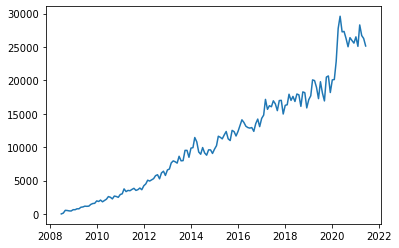

In [23]:
plt.plot(reshaped_df.index, reshaped_df.python)
# alternative way of selecting the column
# plt.plot(reshaped_df.index, reshaped_df['python'])

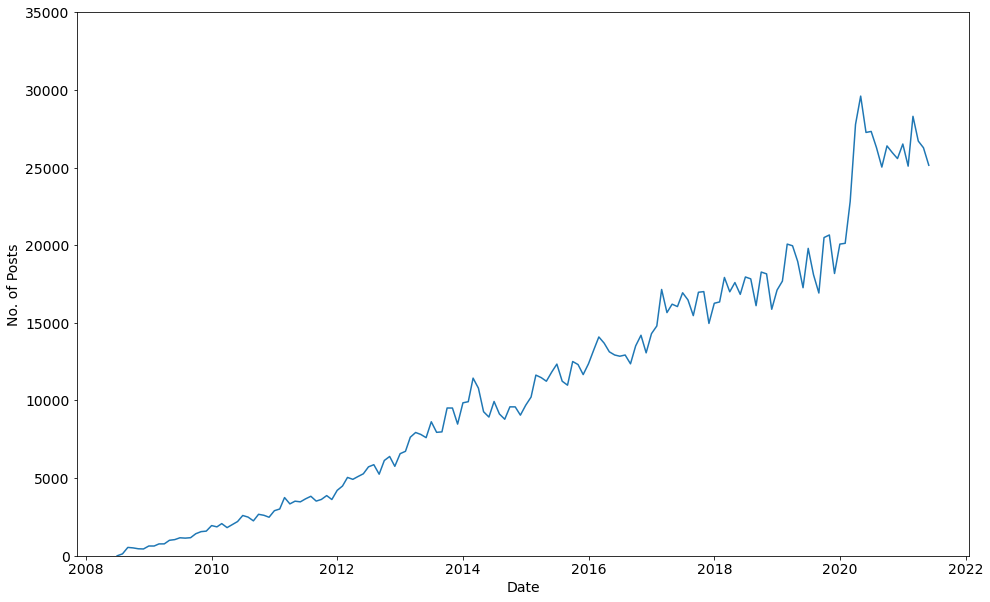

In [24]:
# change the layout a little
plt.figure(figsize=(16,10))# make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)
plt.plot(reshaped_df.index, reshaped_df.python)

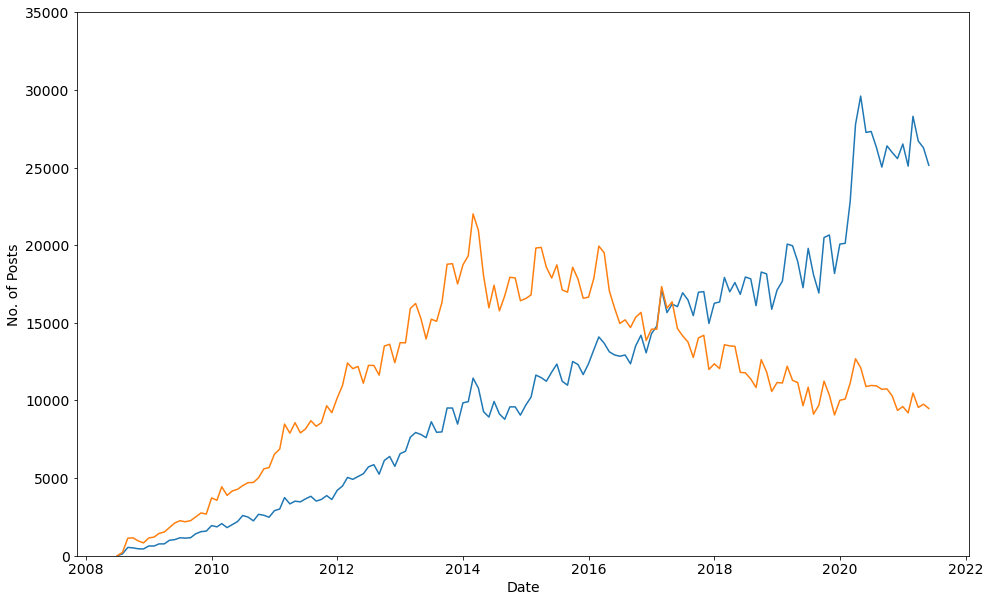

In [25]:
plt.figure(figsize=(16,10)) # make chart larger
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)

# add a second language
plt.plot(reshaped_df.index, reshaped_df.python)
plt.plot(reshaped_df.index, reshaped_df.java)

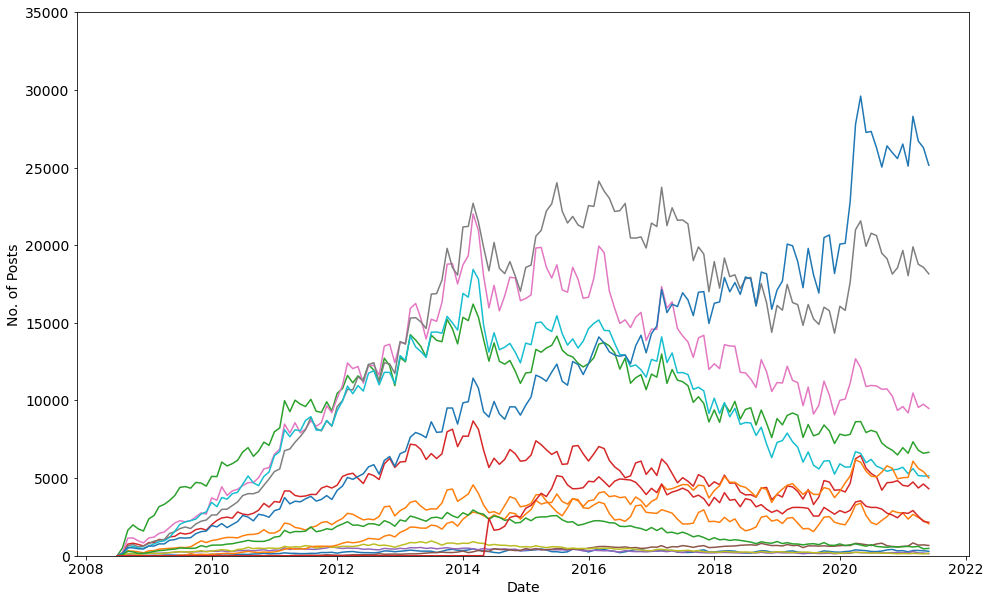

In [26]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot all languages using for loop
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column])

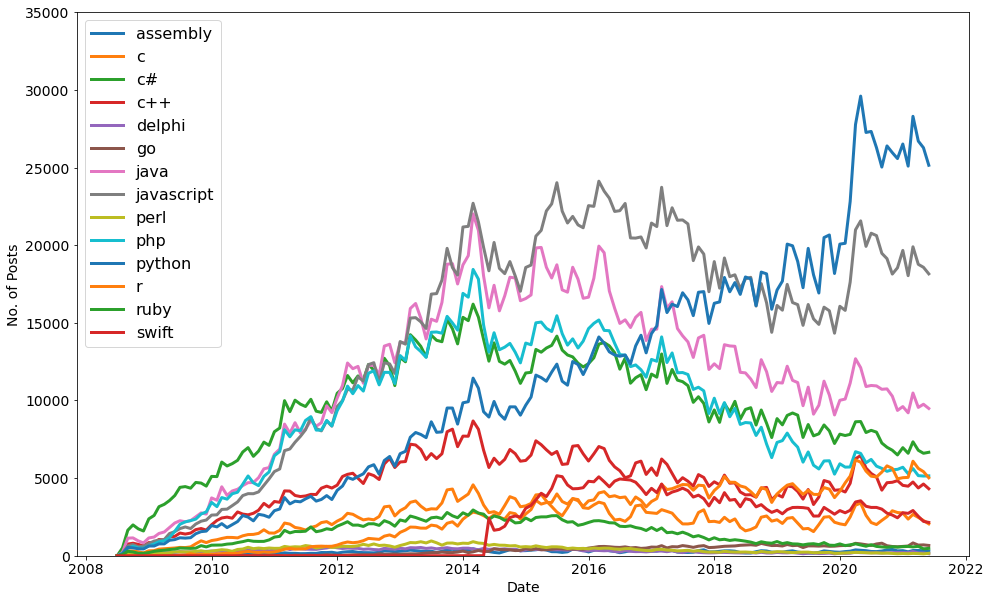

In [27]:
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], 
             linewidth=3, label=reshaped_df[column].name)

plt.legend(fontsize=16) # add a legend

# Smoothing out Time Series Data

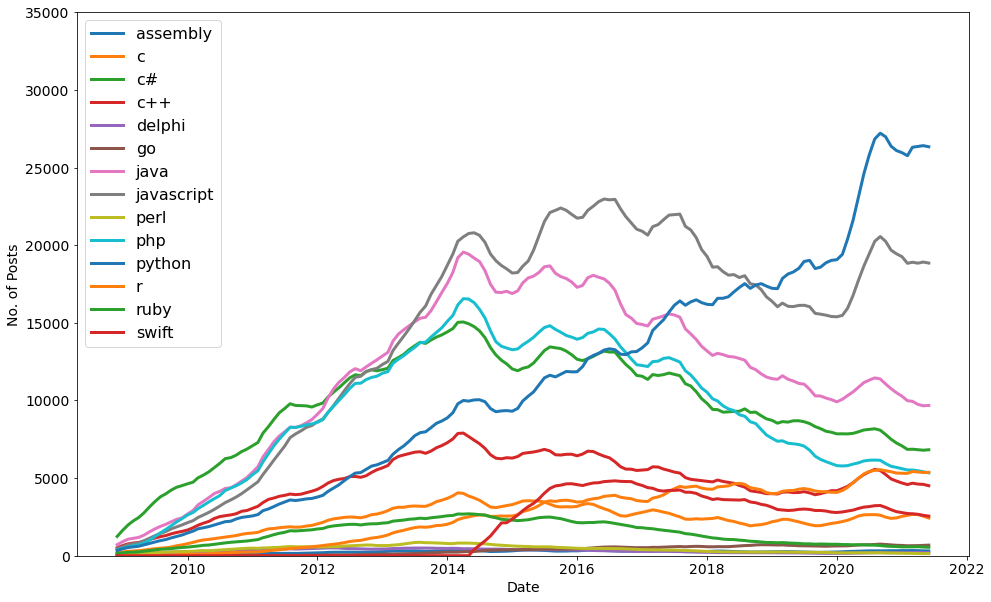

In [28]:
# time window respresents the number of observations (average)
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('No. of Posts', fontsize=14)
plt.ylim(0, 35000)

# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)

plt.legend(fontsize=16)